In [69]:
import numpy as np
import os
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/toshiya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
root = "/home/toshiya/Workspace/learning/signate/SIGNATE_Student_Cup_2020/"

## データ件数

In [4]:
train = pd.read_csv(os.path.join(root, "data", "train.csv"))
train

,id,description,jobflag
0,0,"Executes and writes portions of testing plans,...",2
1,1,Maintain Network Performance by assisting with...,3
2,2,Supports the regional compliance manager with ...,4
3,3,Keep up to date with local and national busine...,1
4,4,Assist with Service Organization Control (SOC)...,4
...,...,...,...
2926,2926,Preparation of reports for operational and man...,3
2927,2927,Line and/or indirect management of up to 20 st...,3
2928,2928,Partner with external agencies as needed,1
2929,2929,"Design, Implement and test software for embedd...",3


In [5]:
train.groupby(by="jobflag").count()

,id,description
jobflag,,
1,624,624
2,348,348
3,1376,1376
4,583,583


## 単語分析

- 特徴となる単語を探したい
    - ラベルごとに多い単語
    - その少量だがそのラベルにしか出てこない単語
    - 特定のラベルに頻出する単語

### Preprocessing

In [7]:
ds = train[train["jobflag"] == 1]
ml = train[train["jobflag"] == 2]
se = train[train["jobflag"] == 3]
co = train[train["jobflag"] == 4]

In [31]:
def preprocessing(text):
    text = re.sub("<br />", "", text)
    
    for p in string.punctuation:
        if (p == ".") or (p == ","):
            continue
        else:
            text = text.replace(p, " ")
    
    text = text.replace(".", " . ")
    text = text.replace(",", " , ")
    text = text.lower()
    text = text.split(' ')
    stop_words = stopwords.words('english') + ['', ',','.']
    text = [w for w in text if w not in stop_words]
    
    return text

In [77]:
def count_words(df):
    words = {}
    for d in df["description"]:
        text = preprocessing(d)
        for w in text:
            words[w] = words.get(w, 0) + 1
            
    words = sorted(words.items(), key=lambda x:x[1], reverse=True)
    num_words = sum([i[1] for i in words])
    words = [(i[0], i[1] / num_words) for i in words]
    
    return np.array(words)

In [78]:
train_words = count_words(train)
train_words

array([['data', '0.019774646078777568'],
       ['software', '0.011364001155661135'],
       ['business', '0.011042984173862798'],
       ...,
       ['agencies', '3.210169817983371e-05'],
       ['11', '3.210169817983371e-05'],
       ['preprocess', '3.210169817983371e-05']], dtype='<U22')

In [76]:
def show_words_ratio(l: list, show_num: int):
    fig, ax = plt.subplots(figsize=(16,10), facecolor='white', dpi=80)
    sns.barplot(x=l[:show_num, 1], y=l[:show_num, 0], orient='h')
    plt.show()
    

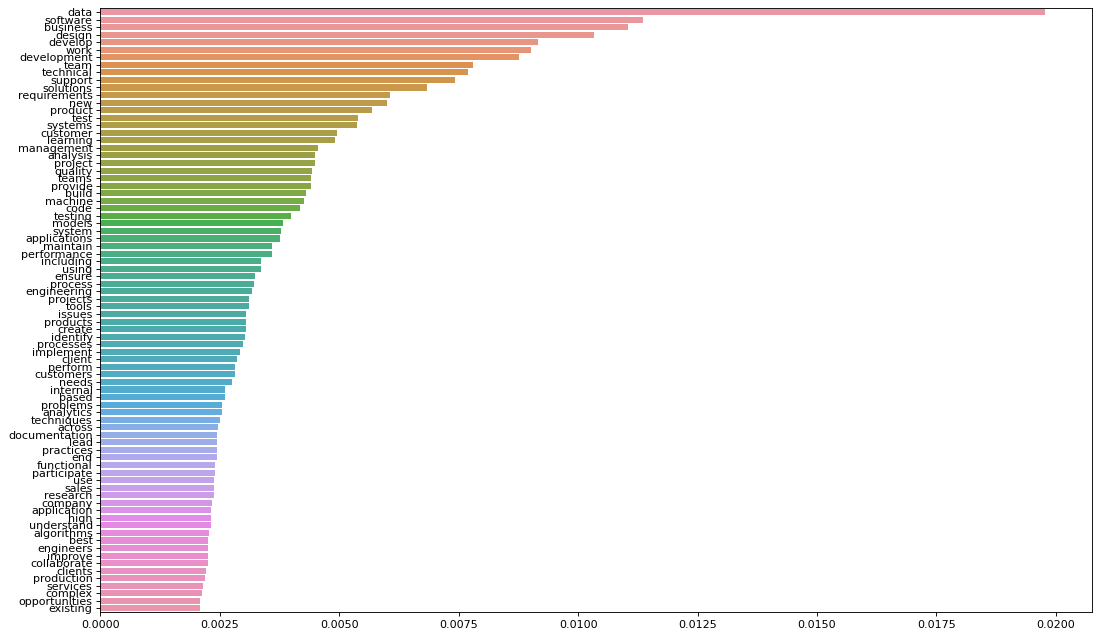

In [81]:
show_words_ratio(train_words, 80)

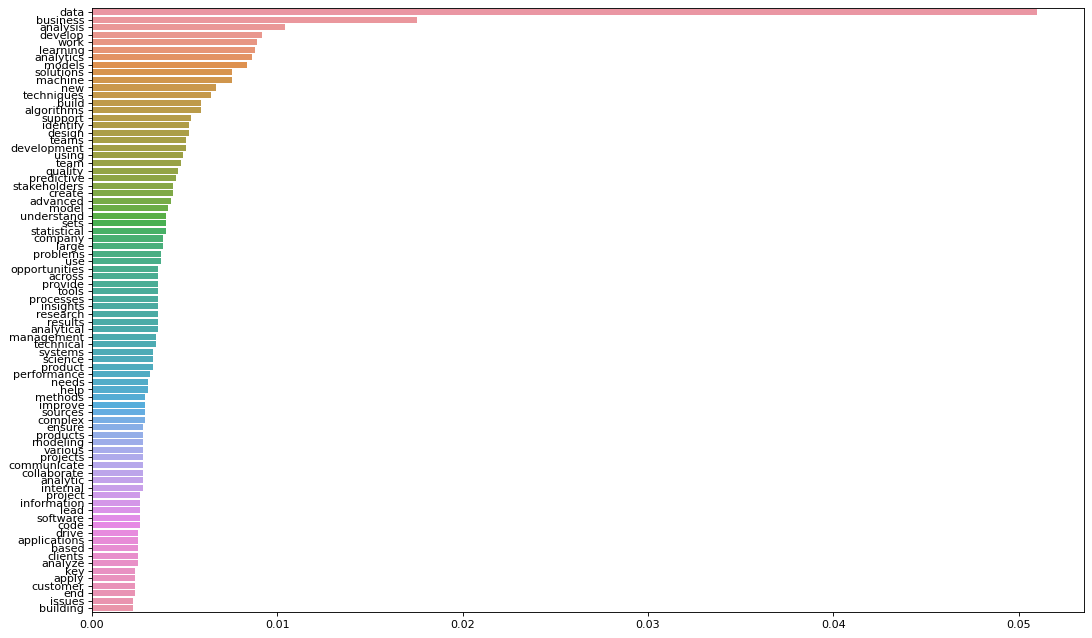

In [83]:
ds_words = count_words(ds)
show_words_ratio(ds_words, 80)

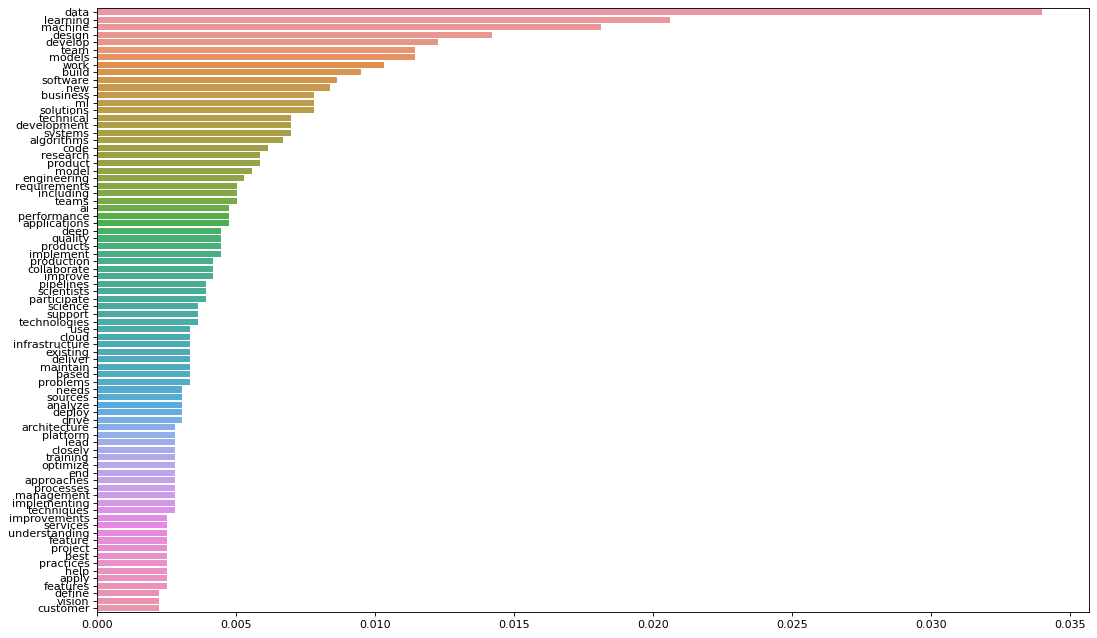

In [84]:
ml_words = count_words(ml)
show_words_ratio(ml_words, 80)

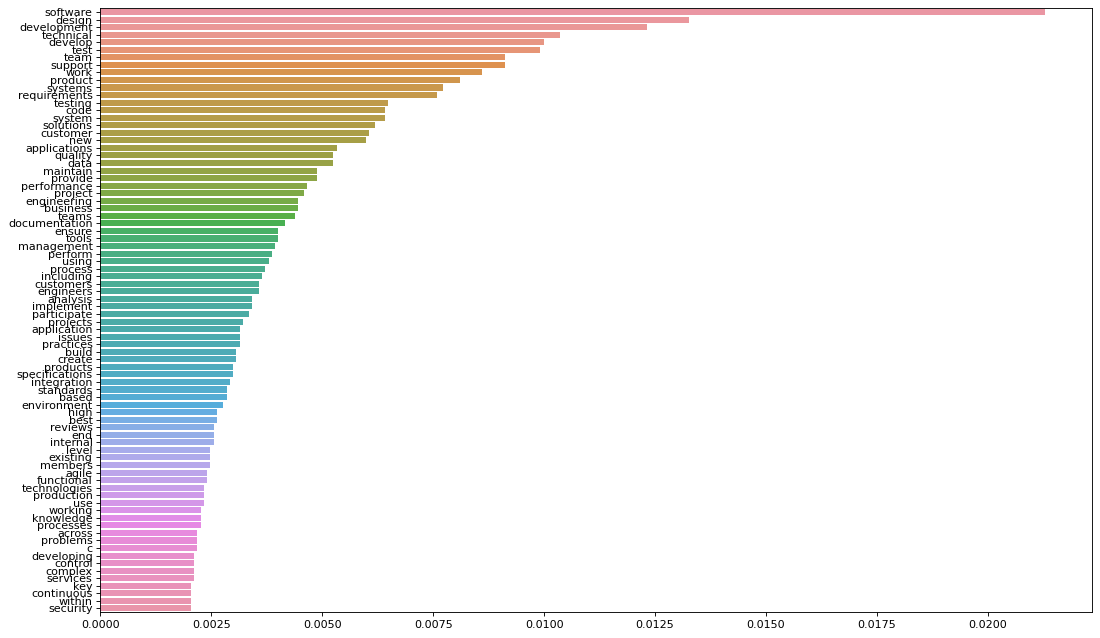

In [85]:
se_words = count_words(se)
show_words_ratio(se_words, 80)

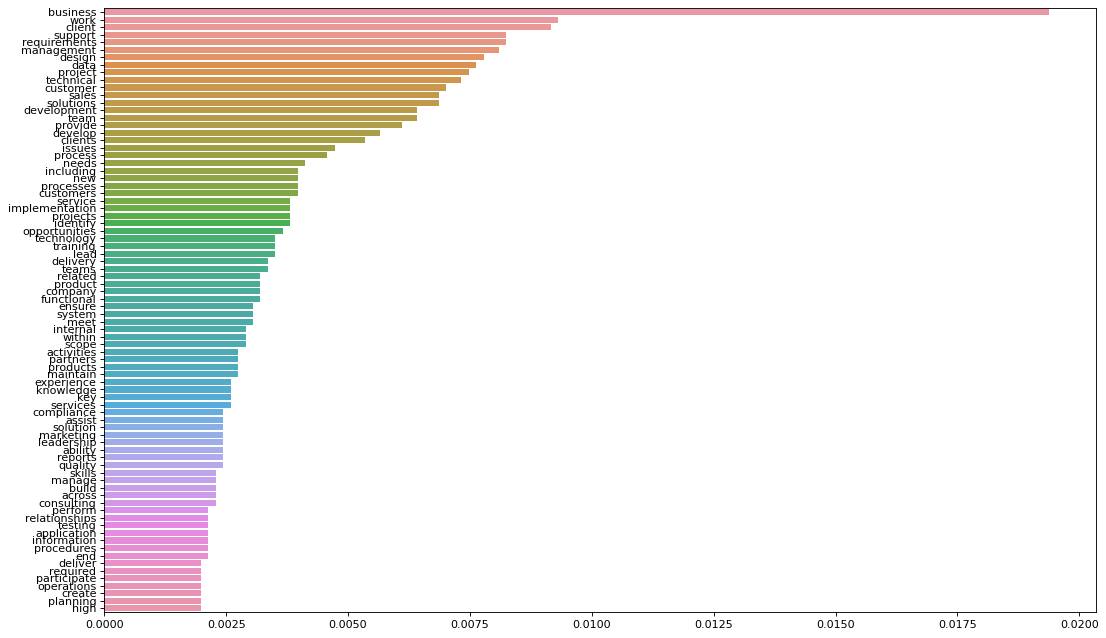

In [86]:
co_words = count_words(co)
show_words_ratio(co_words, 80)